c:\Users\Galih Setiawan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8590 - loss: 0.4832
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9543 - loss: 0.1504
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9671 - loss: 0.1119
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9724 - loss: 0.0883
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0776
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0868
Test accuracy: 0.9768000245094299
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


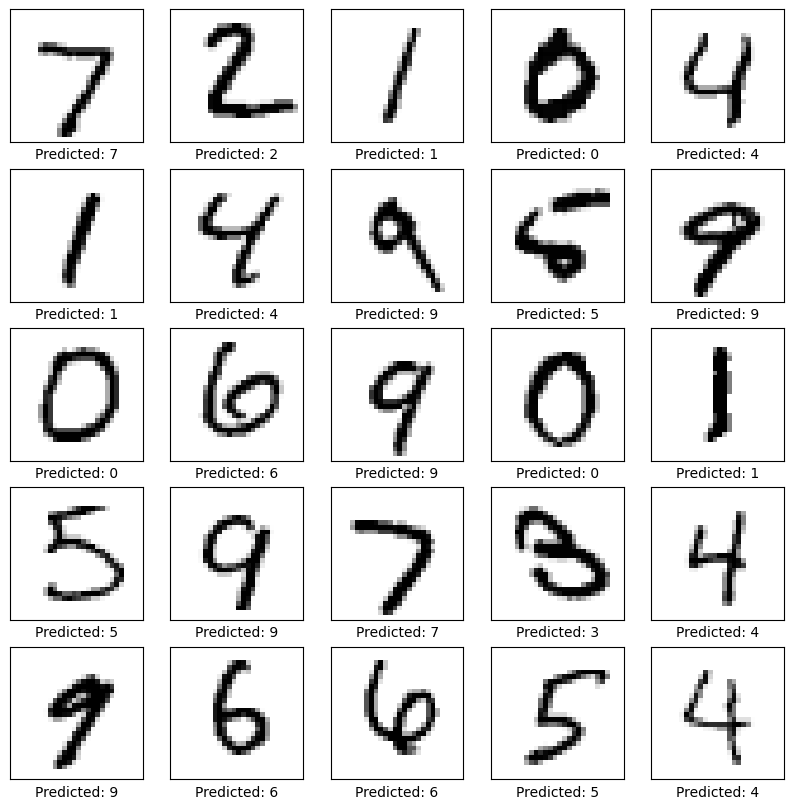

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Memuat dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Membangun model sederhana
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model
model.fit(x_train, y_train, epochs=5)

# Evaluasi model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Prediksi contoh gambar
predictions = model.predict(x_test)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(f'Predicted: {predictions[i].argmax()}')
plt.show()


In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules

# Data transaksi
transactions = [
    ['milk', 'bread', 'beer'],
    ['milk', 'bread'],
    ['milk', 'beer'],
    ['bread', 'beer'],
    ['milk', 'bread', 'beer', 'diaper']
]

# Mengubah data transaksi menjadi format yang sesuai
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Menemukan frequent itemsets dengan min_support=0.6
frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)
print("Frequent Itemsets:\n", frequent_itemsets)

# Menemukan aturan asosiasi dengan min_threshold=0.7
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
print("Association Rules:\n", rules)


Frequent Itemsets:
    support       itemsets
0      0.8         (milk)
1      0.8        (bread)
2      0.8         (beer)
3      0.6  (bread, milk)
4      0.6  (beer, bread)
5      0.6   (beer, milk)
Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0     (bread)      (milk)                 0.8                 0.8      0.6   
1      (milk)     (bread)                 0.8                 0.8      0.6   
2      (beer)     (bread)                 0.8                 0.8      0.6   
3     (bread)      (beer)                 0.8                 0.8      0.6   
4      (beer)      (milk)                 0.8                 0.8      0.6   
5      (milk)      (beer)                 0.8                 0.8      0.6   

   confidence    lift  leverage  conviction  zhangs_metric  
0        0.75  0.9375     -0.04         0.8          -0.25  
1        0.75  0.9375     -0.04         0.8          -0.25  
2        0.75  0.9375     -0.04         0.8     

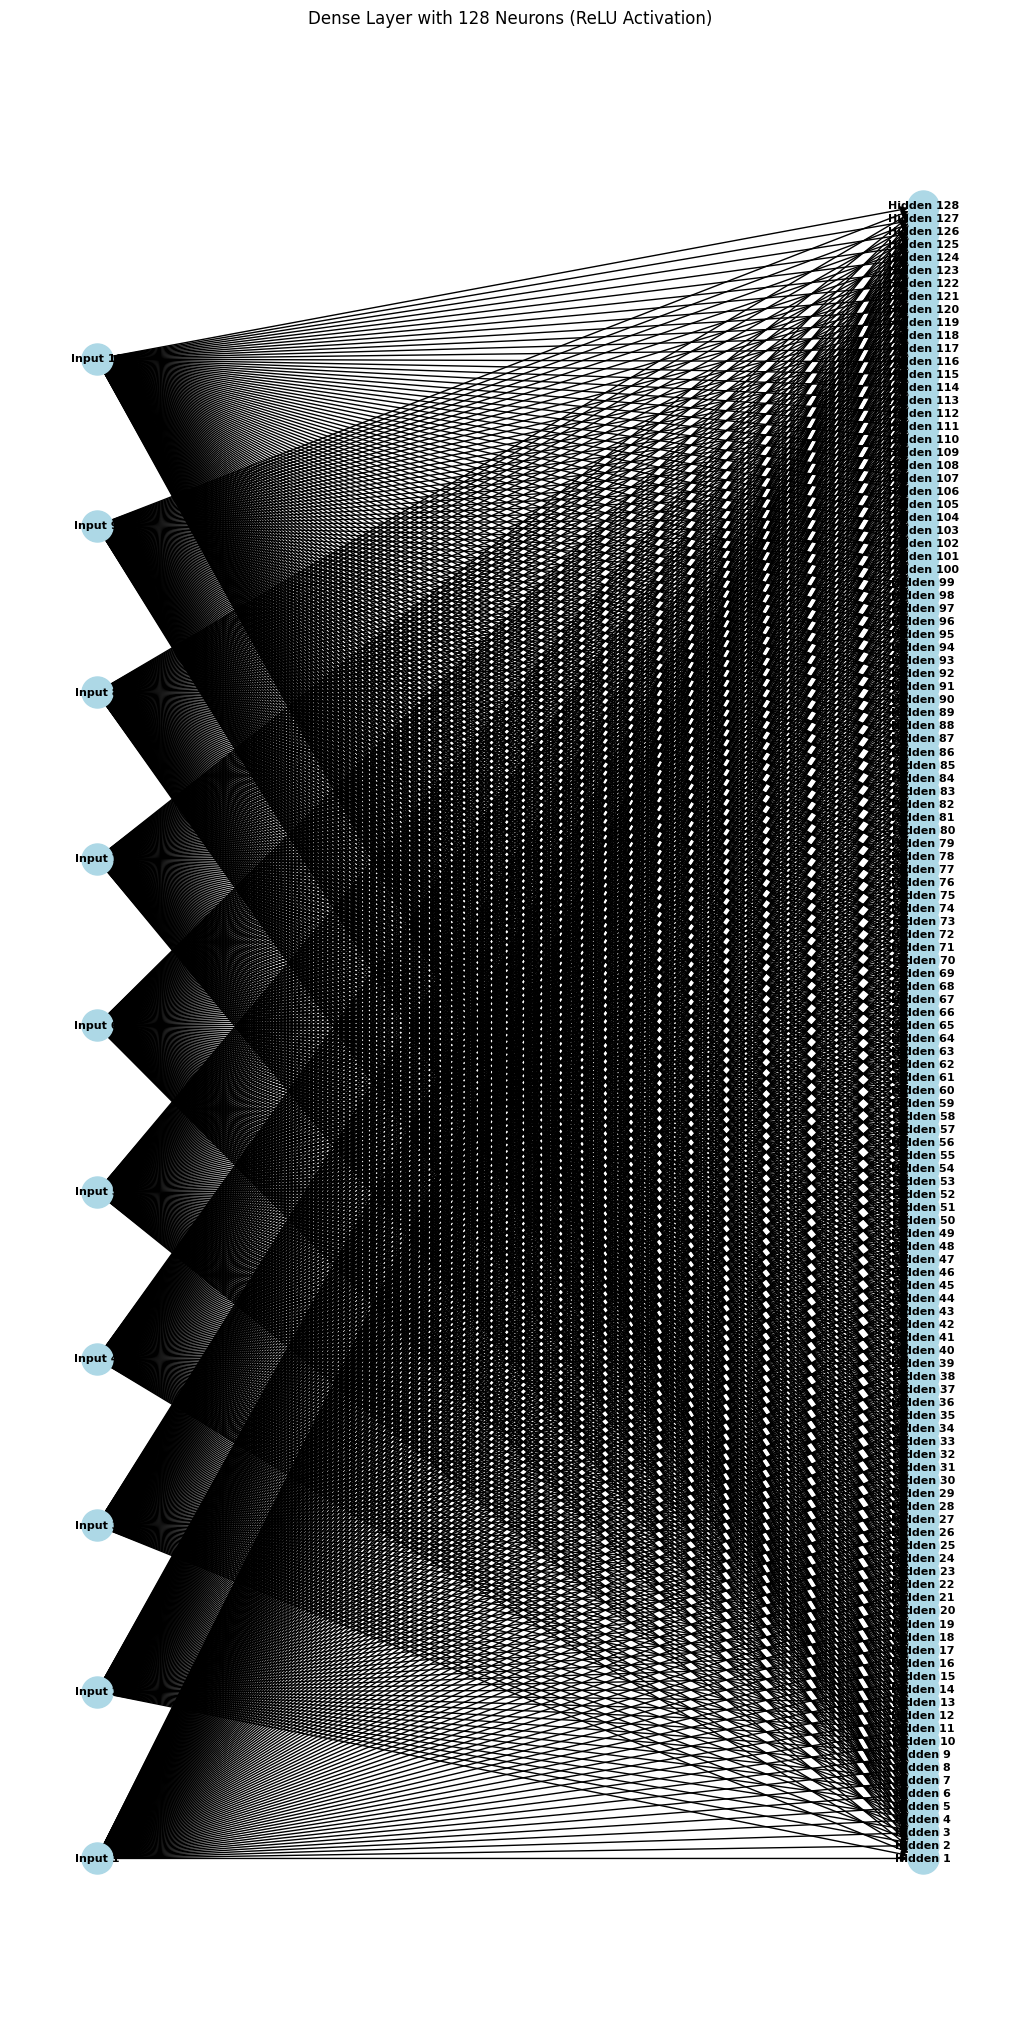

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Number of neurons in input and hidden layer
input_neurons = 10
hidden_neurons = 128

# Add nodes for input layer
for i in range(input_neurons):
    G.add_node(f'Input {i+1}', pos=(0, i))

# Add nodes for hidden layer
for i in range(hidden_neurons):
    G.add_node(f'Hidden {i+1}', pos=(1, i * (input_neurons / hidden_neurons)))

# Add edges between input and hidden layer
for i in range(input_neurons):
    for j in range(hidden_neurons):
        G.add_edge(f'Input {i+1}', f'Hidden {j+1}')

# Get positions for nodes
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph
plt.figure(figsize=(10, 20))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=8, font_weight='bold')
plt.title('Dense Layer with 128 Neurons (ReLU Activation)')
plt.show()


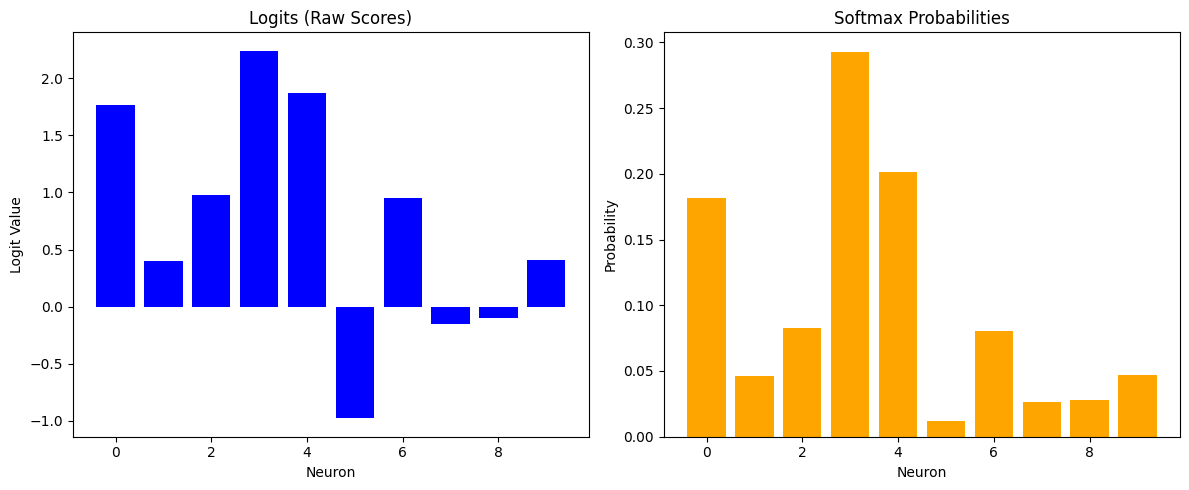

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Softmax Function
def softmax(logits):
    exp_values = np.exp(logits - np.max(logits))  # For numerical stability
    probabilities = exp_values / np.sum(exp_values)
    return probabilities

# Generate Random Logits
np.random.seed(0)  # For reproducibility
logits = np.random.randn(10)  # Generate 10 random logits for the 10 output neurons

# Apply the Softmax Function
probabilities = softmax(logits)

# Plot the Logits and Softmax Probabilities
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(10), logits, color='blue')
plt.title('Logits (Raw Scores)')
plt.xlabel('Neuron')
plt.ylabel('Logit Value')

plt.subplot(1, 2, 2)
plt.bar(range(10), probabilities, color='orange')
plt.title('Softmax Probabilities')
plt.xlabel('Neuron')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()


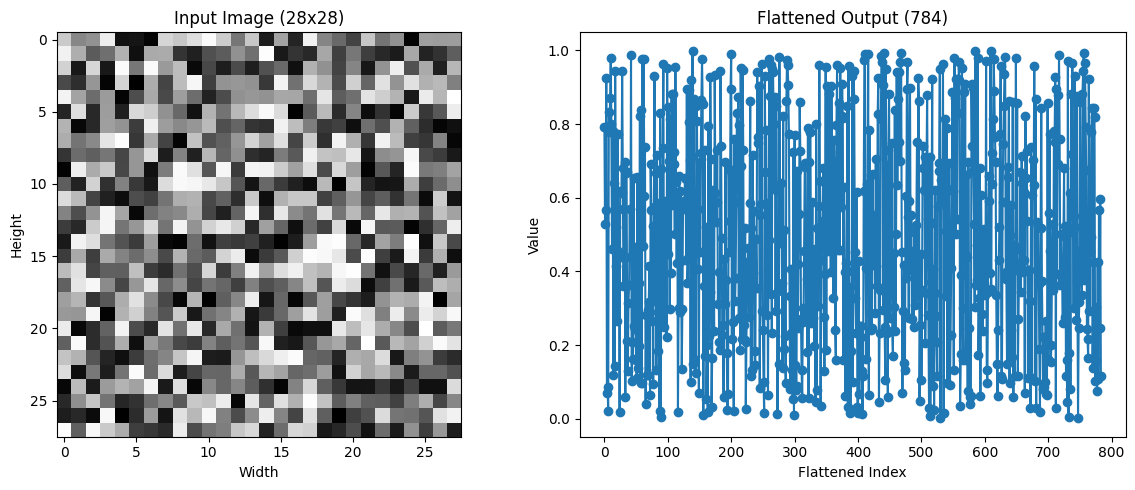

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulasi data input gambar 28x28
input_shape = (28, 28)
input_data = np.random.rand(*input_shape)  # Generate random image

# Flattening menggunakan numpy
flattened_data = input_data.flatten()

# Plot gambar input 28x28
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_data, cmap='gray')
plt.title('Input Image (28x28)')
plt.xlabel('Width')
plt.ylabel('Height')

# Plot data setelah di-flatten
plt.subplot(1, 2, 2)
plt.plot(flattened_data, 'o-')
plt.title('Flattened Output (784)')
plt.xlabel('Flattened Index')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
